In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [2]:

# Open the binary file
with open('../GW.dat', 'rb') as f:
    # Read the dimensions (ncol, nlev) - Fortran writes integers in 4 bytes by default
    ncol, nlev = np.fromfile(f, dtype=np.int32, count=2)
    print(f"Dimensions read from file: ncol={ncol}, nlev={nlev}")


    # read booleans (4 bytes each)
    flags_int = np.fromfile(f, dtype=np.int32, count=2)
    use_gw_rdg_beta , use_gw_movmtn_pbl = flags_int != 0  # convert to booleans

    print( f"Boolean use_gw_rdg_beta and use_gw_movmtn_pbl vars => {use_gw_rdg_beta} {use_gw_movmtn_pbl}" )
    
    # Read array (two dimensions), Fortran order
    zm = np.fromfile(f, dtype=np.float64, count=ncol * nlev).reshape((ncol, nlev), order='F')
    # Read  array (two dimensions), Fortran order
    zi = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    
    tau_a = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_b = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

    bwv = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    tlb = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    wbr = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    ubmsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    nsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    tauoro = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    taudsw = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    
    ubm = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
    tau = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_diag = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

    if (use_gw_movmtn_pbl==True):
        ubm_movmtn = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
        tau_movmtn = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

# 


Dimensions read from file: ncol=48600, nlev=93
Boolean use_gw_rdg_beta and use_gw_movmtn_pbl vars => True True


In [3]:
print( tau_movmtn.shape )

(48600, 94)


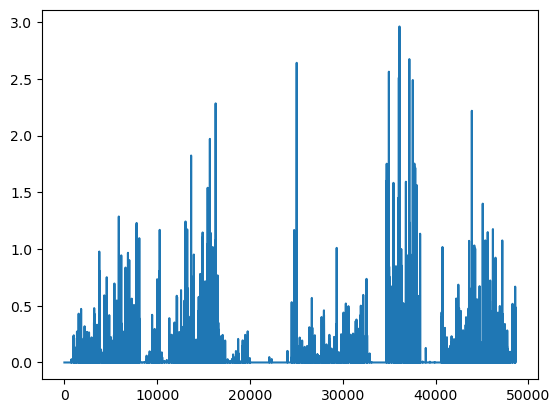

In [4]:
plt.plot( taudsw )

In [5]:
#hfile =   '/glade/derecho/scratch/juliob/archive/ndg_Rdg04_c6455g3/atm/hist/ndg_Rdg04_c6455g3.cam.h2i.2014-01-15-00000.nc'
hfile =   '/glade/derecho/scratch/juliob/archive/ndg_x02_ne30pg3_fmt_c64109/atm/hist/ndg_x02_ne30pg3_fmt_c64109.cam.h2i.2004-06-15-00000.nc'
X=xr.open_dataset( hfile )

In [6]:
X

<xarray.Dataset> Size: 368MB
Dimensions:       (ncol: 48600, lev: 93, ilev: 94, time: 1, trop_pref: 84,
                   trop_prefi: 85, trop_cld_lev: 84)
Coordinates:
  * lev           (lev) float64 744B 0.008135 0.01834 0.03482 ... 991.2 997.5
  * ilev          (ilev) float64 752B 0.004259 0.01201 0.02467 ... 995.1 1e+03
  * trop_pref     (trop_pref) float64 672B 1.196 1.891 2.804 ... 991.2 997.5
  * trop_prefi    (trop_prefi) float64 680B 0.9031 1.489 2.293 ... 995.1 1e+03
  * trop_cld_lev  (trop_cld_lev) float64 672B 1.196 1.891 2.804 ... 991.2 997.5
  * time          (time) object 8B 2004-06-15 00:00:00
Dimensions without coordinates: ncol
Data variables: (12/62)
    lat           (ncol) float64 389kB ...
    lon           (ncol) float64 389kB ...
    areawt        (ncol) float64 389kB ...
    area          (ncol) float64 389kB ...
    hyam          (lev) float64 744B ...
    hybm          (lev) float64 744B ...
    ...            ...
    TAUM1_DIAG    (time, ilev, ncol) float32 18MB ...
    ZIEGW         (time, ilev, ncol) float32 18MB ...
    TAUM1_DIAG_A  (time, ilev, ncol) float32 18MB ...
    TAUM1_DIAG_B  (time, ilev, ncol) float32 18MB ...
    TAU1RDGBETAM  (time, ilev, ncol) float32 18MB ...
    TAU_MOVMTN    (time, ilev, ncol) float32 18MB ...
Attributes:
    ne:                30
    fv_nphys:          3
    Conventions:       CF-1.0
    source:            CAM
    case:              ndg_x02_ne30pg3_fmt_c64109
    logname:           juliob
    host:              dec0627
    initial_file:      /glade/campaign/cgd/amp/juliob/ERA5/ne30np4/L93/ERA5_x...
    topography_file:   /glade/work/juliob/bndtopo/ne30pg3_gmted2010_modis_bed...
    model_doi_url:     not_set
    time_period_freq:  hour_6

In [20]:
lon = X.lon.values
lat = X.lat.values

taudsw_cam = X.TAUDSW1.values
tauoro_cam = X.TAUORO1.values
tau_a_cam = X.TAUM1_DIAG_A.values
tau_b_cam = X.TAUM1_DIAG_B.values
tau_diag_cam = X.TAUM1_DIAG.values
tau_cam=X.TAU1RDGBETAM.values
ubm_cam=X.UBM1BETA.values
zm_cam=X.ZMEGW.values
zi_cam=X.ZIEGW.values
mxdis=X.MXDIS1.values
tau_movmtn_cam = X.TAU_MOVMTN.values


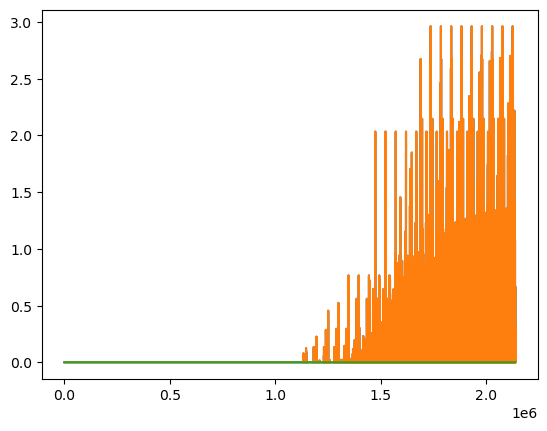

In [8]:
z=np.arange(start=50,stop=94)
plt.plot( tau_a_cam[0,z,:].flatten() )
plt.plot( tau_a.T[z,:].flatten() )
plt.plot( tau_a_cam[0,z,:].flatten() -  tau_a.T[z,:].flatten() )


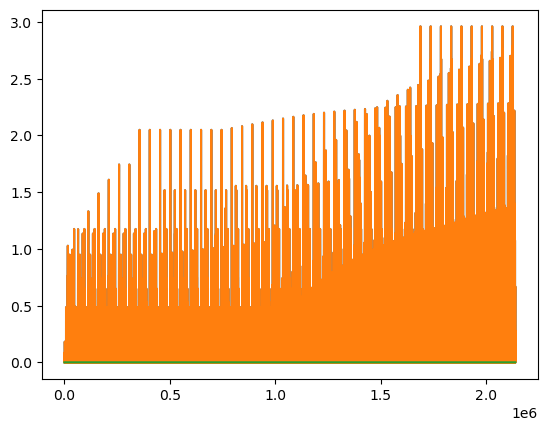

In [9]:
z=np.arange(start=50,stop=94)
plt.plot( tau_diag_cam[0,z,:].flatten() )
plt.plot( tau_diag.T[z,:].flatten() )
plt.plot( tau_diag_cam[0,z,:].flatten() -  tau_diag.T[z,:].flatten() )


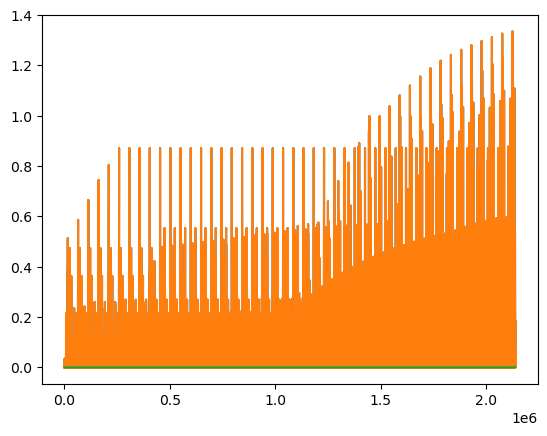

In [10]:
z=np.arange(start=50,stop=94)
plt.plot( tau.T[z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() -  tau.T[z,:].flatten() )


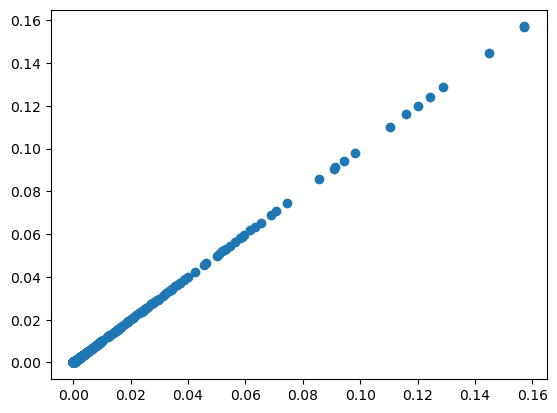

In [11]:
z=20 #np.arange(start=50,stop=94)
plt.scatter( tau_diag_cam[0,z,:].flatten() ,  tau_diag.T[z,:].flatten() )


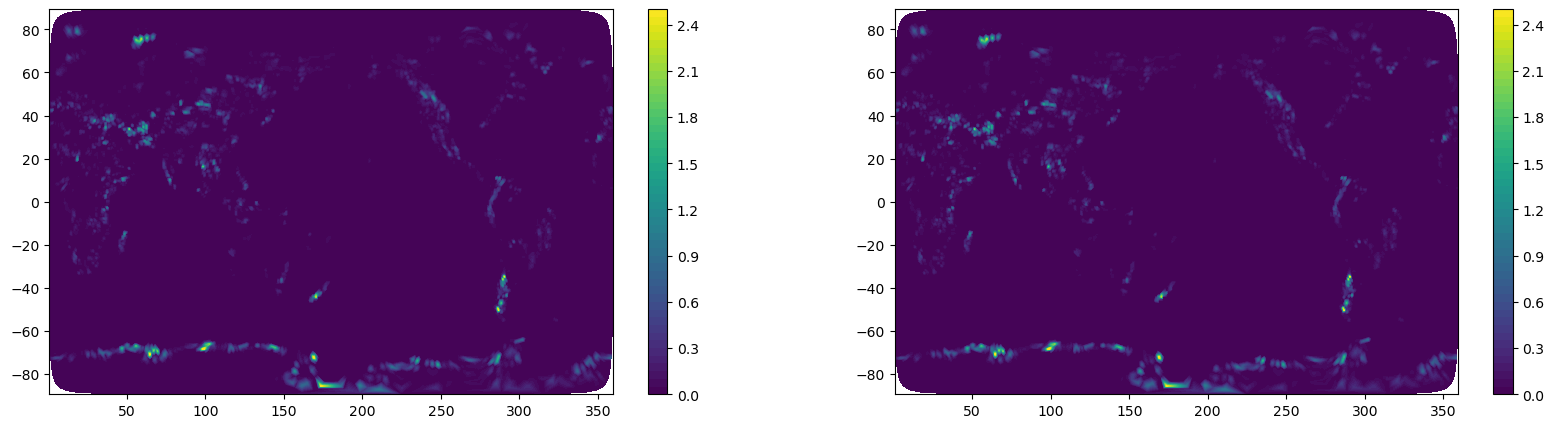

In [12]:
z=93
lev=1*np.linspace(0.,2.5,num=51)
fig,ax=plt.subplots(1,2,figsize=(20,5))
co=ax[0].tricontourf( lon,lat, tau_diag_cam[0,z,:], levels=lev )
plt.colorbar(co)
co=ax[1].tricontourf( lon,lat, tau_diag.T[z,:], levels=lev )
plt.colorbar(co)


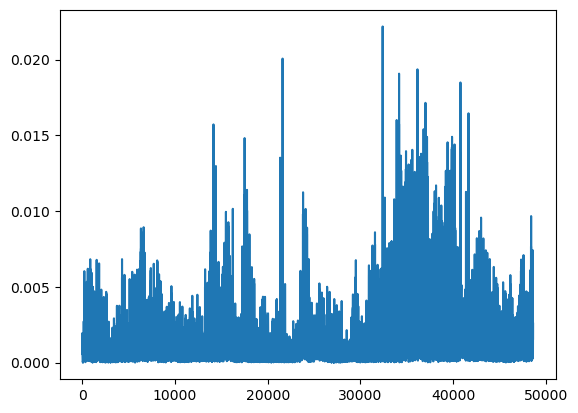

In [13]:
#plt.plot(ubm_movmtn[10_000,:] )
plt.plot(tau_movmtn[:,70] )

In [14]:
X

<xarray.Dataset> Size: 368MB
Dimensions:       (ncol: 48600, lev: 93, ilev: 94, time: 1, trop_pref: 84,
                   trop_prefi: 85, trop_cld_lev: 84)
Coordinates:
  * lev           (lev) float64 744B 0.008135 0.01834 0.03482 ... 991.2 997.5
  * ilev          (ilev) float64 752B 0.004259 0.01201 0.02467 ... 995.1 1e+03
  * trop_pref     (trop_pref) float64 672B 1.196 1.891 2.804 ... 991.2 997.5
  * trop_prefi    (trop_prefi) float64 680B 0.9031 1.489 2.293 ... 995.1 1e+03
  * trop_cld_lev  (trop_cld_lev) float64 672B 1.196 1.891 2.804 ... 991.2 997.5
  * time          (time) object 8B 2004-06-15 00:00:00
Dimensions without coordinates: ncol
Data variables: (12/62)
    lat           (ncol) float64 389kB -35.03 -35.48 -35.92 ... 36.66 36.2 35.74
    lon           (ncol) float64 389kB 315.5 316.5 317.5 ... 137.0 136.0 135.0
    areawt        (ncol) float64 389kB ...
    area          (ncol) float64 389kB ...
    hyam          (lev) float64 744B ...
    hybm          (lev) float64 744B ...
    ...            ...
    TAUM1_DIAG    (time, ilev, ncol) float32 18MB 0.0 0.0 ... 0.1744 0.003588
    ZIEGW         (time, ilev, ncol) float32 18MB 8.154e+04 8.151e+04 ... 0.0
    TAUM1_DIAG_A  (time, ilev, ncol) float32 18MB 0.0 0.0 ... 0.1744 0.003588
    TAUM1_DIAG_B  (time, ilev, ncol) float32 18MB 0.0 0.0 ... 0.1744 0.003588
    TAU1RDGBETAM  (time, ilev, ncol) float32 18MB 0.0 0.0 ... 0.01986 0.0001631
    TAU_MOVMTN    (time, ilev, ncol) float32 18MB ...
Attributes:
    ne:                30
    fv_nphys:          3
    Conventions:       CF-1.0
    source:            CAM
    case:              ndg_x02_ne30pg3_fmt_c64109
    logname:           juliob
    host:              dec0627
    initial_file:      /glade/campaign/cgd/amp/juliob/ERA5/ne30np4/L93/ERA5_x...
    topography_file:   /glade/work/juliob/bndtopo/ne30pg3_gmted2010_modis_bed...
    model_doi_url:     not_set
    time_period_freq:  hour_6

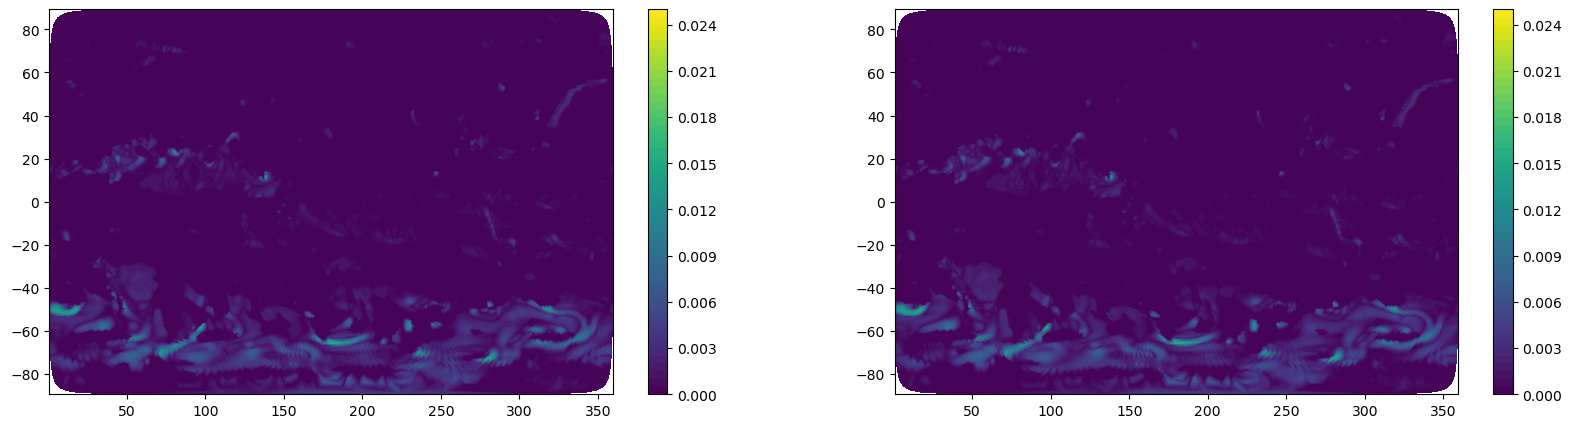

In [21]:
z=20
lev=0.01*np.linspace(0.,2.5,num=51)
fig,axs=plt.subplots(1,2,figsize=(20,5))
ax=axs[0]
co=ax.tricontourf( lon,lat, tau_movmtn.T[z,:], levels=lev )
plt.colorbar(co)
ax=axs[1]
co=ax.tricontourf( lon,lat, tau_movmtn_cam[0,z,:], levels=lev )
plt.colorbar(co)
#co=ax[1].tricontourf( lon,lat, tau_diag.T[z,:], levels=lev )
#plt.colorbar(co)


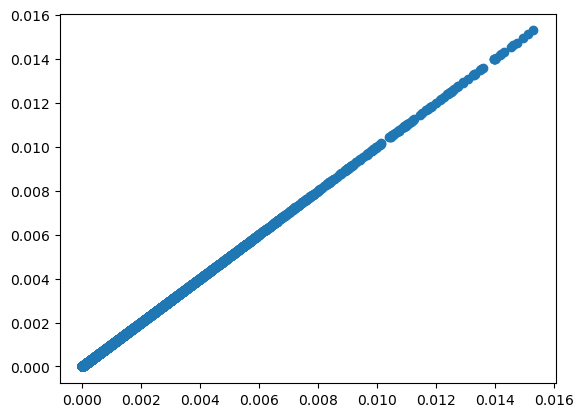

In [22]:
z=20 #np.arange(start=50,stop=94)
plt.scatter( tau_movmtn_cam[0,z,:].flatten() ,  tau_movmtn.T[z,:].flatten() )


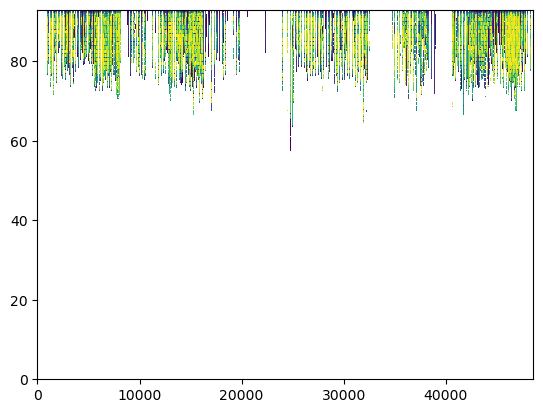

In [16]:
plt.contourf( tau_b.T[:,:]-tau_a.T[:,:] ,levels=lev )

0.06616626649782972


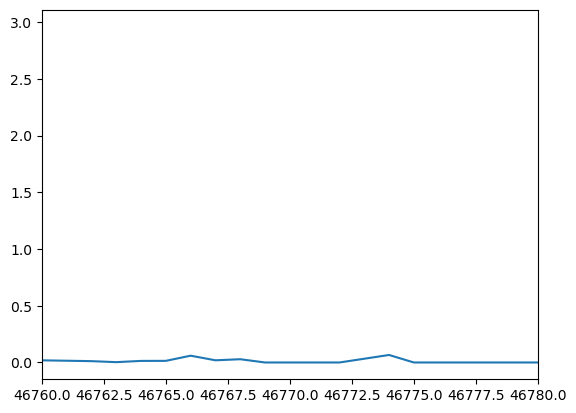

In [17]:
z=93
plt.plot( tau_a[:,z]  )# -tau_a[:,z] )
plt.xlim((46760,46780))
i=46_774
print( tau_a[i,z] )

1536.428


(0.0, 10000.0)

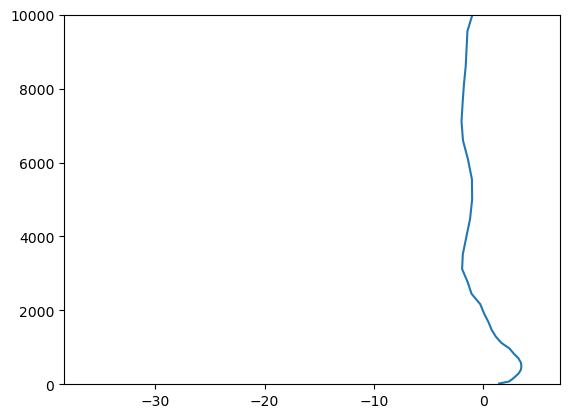

In [18]:
#plt.plot( tau_diag[i,:] )
plt.plot( ubm_cam[0,:,i] , zm_cam[0,:,i] )
print(mxdis[0,i] )
plt.ylim(0,10000)

(0.0, 10000.0)

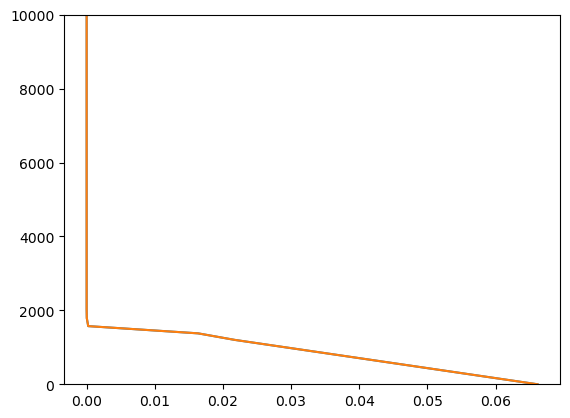

In [19]:
plt.plot( tau_diag[i,:] ,zi_cam[0,:,i])
plt.plot( tau_diag_cam[0,:,i], zi_cam[0,:,i] )
plt.ylim(0,10000)